In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import tree

!pip install imblearn
from imblearn.over_sampling import ADASYN

In [2]:
# Import trainset
trainset = pd.read_csv("PB5_trainset.csv")
trainset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,on_offshore
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,125.903084,1.884796,4.148640,6.578678,12.612115,187.495595,2.641189,6.729075,0.477423,3.962555,0.064427,1.007709,7.985683,0.869493
std,894.696898,5.334074,9.024765,12.162776,24.039501,90.964819,1.596487,3.844990,0.499628,4.816492,0.245580,0.093573,4.072729,0.862462
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,112.750000,1.500000,3.500000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
50%,10.000000,0.000000,0.460000,1.375000,2.355000,209.000000,2.400000,7.200000,0.000000,2.000000,0.000000,1.000000,9.000000,1.000000
75%,20.000000,0.830000,4.000000,7.447500,14.315000,252.000000,3.325000,10.000000,1.000000,2.000000,0.000000,1.000000,11.000000,2.000000
max,24000.000000,57.080000,115.250000,127.320000,251.620000,360.000000,12.100000,14.100000,1.000000,15.000000,1.000000,2.000000,15.000000,2.000000


In [3]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              1816 non-null   object 
 1   Entero            1816 non-null   float64
 2   Rain24            1816 non-null   float64
 3   Rain48            1816 non-null   float64
 4   Rain72            1816 non-null   float64
 5   RainWA            1816 non-null   float64
 6   Wdirection        1816 non-null   int64  
 7   Wspeed            1816 non-null   float64
 8   Solarhours        1816 non-null   float64
 9   BeachName         1816 non-null   object 
 10  BeachType         1816 non-null   int64  
 11  BeachDirection    1816 non-null   int64  
 12  Entero_level      1816 non-null   int64  
 13  Wspeed_level      1816 non-null   int64  
 14  Wdirection_level  1816 non-null   int64  
 15  on_offshore       1816 non-null   int64  
dtypes: float64(7), int64(7), object(2)
memory 

In [4]:
# Delete columns "DATE","Entero","BeachName"
data_frame = trainset.drop(columns=['Entero','DATE','BeachName'])

# Move column "Entero_level" to the front
data_frame = data_frame[ ['Entero_level'] + [ col for col in data_frame.columns if col != 'Entero_level' ] ]
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entero_level      1816 non-null   int64  
 1   Rain24            1816 non-null   float64
 2   Rain48            1816 non-null   float64
 3   Rain72            1816 non-null   float64
 4   RainWA            1816 non-null   float64
 5   Wdirection        1816 non-null   int64  
 6   Wspeed            1816 non-null   float64
 7   Solarhours        1816 non-null   float64
 8   BeachType         1816 non-null   int64  
 9   BeachDirection    1816 non-null   int64  
 10  Wspeed_level      1816 non-null   int64  
 11  Wdirection_level  1816 non-null   int64  
 12  on_offshore       1816 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 184.6 KB


In [5]:
#AdaBoost = AdaBoostClassifier(n_estimators=400, learning_rate=1,algorithm='SAMME')
AdaBoost = AdaBoostClassifier(learning_rate=0.0001)

BDT with ADASYN (n=10) balanced data ----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'Wdirection_level'
 'on_offshore']
Overall accuracy :  0.6280084745762712
Sensitivity :  0.5500854700854702
Specificity :  0.704621848739496


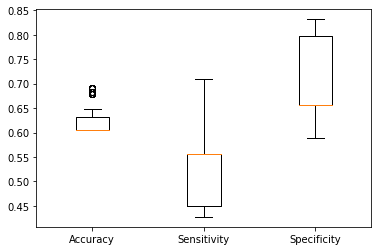

In [6]:
### BDT with ADASYN balanced data
print("BDT with ADASYN (n=10) balanced data ----")
print("input data -", end =" ")
input_data = data_frame.drop(columns=['Entero_level'])
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)
# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# Use real above data form testset above data
testset_above_data = input_real_above_data.drop(columns=['Entero_level'])
water_above_label = input_real_above_data['Entero_level']

# Calculate ratio for train/test for real below data
len_testset = len(input_real_above_data)
ratio = round(len_testset/len(input_real_below_data),2)

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
sen=np.zeros(100)
spe=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=input_data.columns)
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:-1]
    water_fake_label = data_fake_frame.iloc[:,-1]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.drop(columns=['Entero_level'])
    entero_real_data = input_real_below_data.iloc[:,0]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    sc = preprocessing.Normalizer().fit(trainset_data)
    trainset_data = sc.transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run BDT
    bdt=AdaBoost.fit(trainset_data, trainset_labels)
    cm1 = confusion_matrix(testset_labels,bdt.predict(testset_data))
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    j[i] = (cm1[0,0]+cm1[1,1])/total1
    sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    i=i+1

#End of loop

# Show the KNN result
print ('Overall accuracy : ', j.mean())
print('Sensitivity : ', sen.mean())
print('Specificity : ', spe.mean())
plt.boxplot([j, sen, spe])
plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
plt.show()


BDT model with ADASYN (n=10) balanced data----
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6461864406779663
Sensitivity :  0.5415384615384616
Specificity :  0.7490756302521008


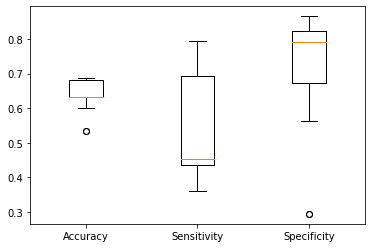

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6272457627118646
Sensitivity :  0.5654700854700855
Specificity :  0.6879831932773111


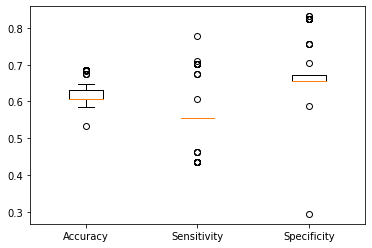

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6327118644067798
Sensitivity :  0.5779487179487179
Specificity :  0.6865546218487398


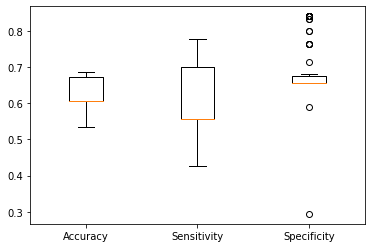

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6059322033898307
Sensitivity :  0.5555555555555555
Specificity :  0.6554621848739498


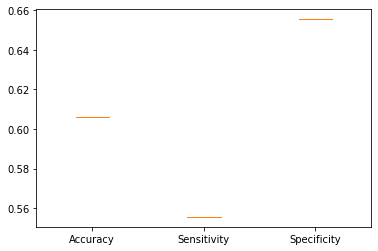

Drop: Wdirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6059322033898307
Sensitivity :  0.5555555555555555
Specificity :  0.6554621848739498


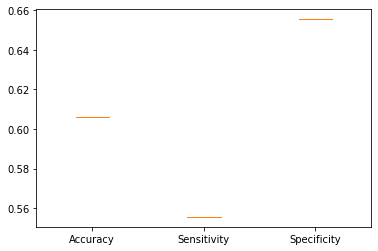

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6250423728813561
Sensitivity :  0.5325641025641027
Specificity :  0.715966386554622


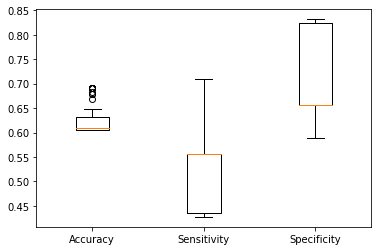

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.621271186440678
Sensitivity :  0.5165811965811966
Specificity :  0.7242016806722691


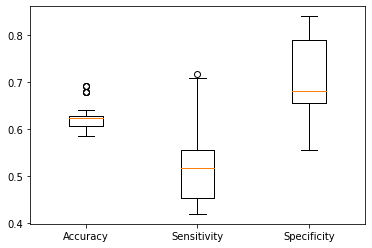

Drop: BeachType
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6245338983050849
Sensitivity :  0.5311965811965813
Specificity :  0.7163025210084035


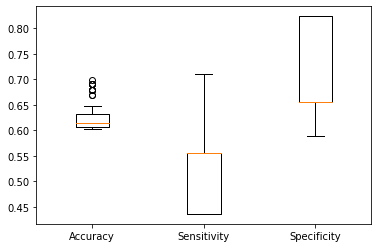

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6141525423728814
Sensitivity :  0.5040170940170942
Specificity :  0.7224369747899161


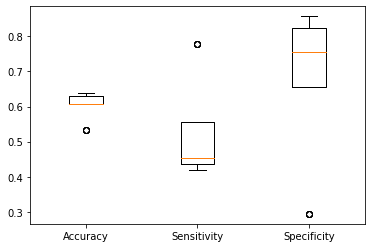

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.6239406779661018
Sensitivity :  0.5465811965811966
Specificity :  0.7000000000000002


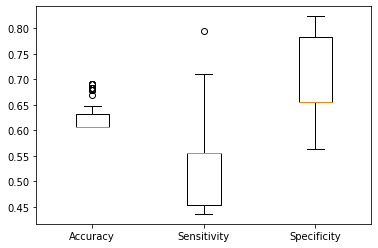

Drop: Wdirection_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6242372881355933
Sensitivity :  0.5884615384615385
Specificity :  0.6594117647058825


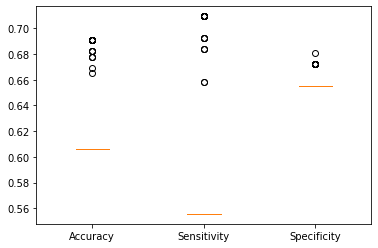

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'Wdirection_level']
Overall accuracy :  0.6189406779661017
Sensitivity :  0.5335897435897436
Specificity :  0.7028571428571431


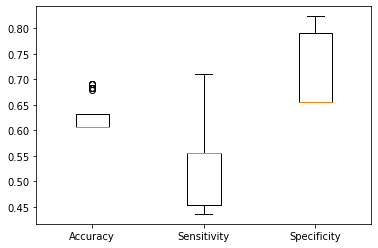

Best sensitivity:  0.5884615384615385 after drop  ['Wdirection_level']
Best accuracy:  0.6461864406779663 after drop  ['Rain24']


In [7]:
### BDT with ADASYN balanced data - drop one parameter each time to compare
print("BDT model with ADASYN (n=10) balanced data----")
best_sen_drop=[]
best_acc_drop=[]
best_acc=j.mean()
best_sen=sen.mean()
for col in c:
    print("Drop:", col)
    input_data = data_frame.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame['Entero_level']==1)
    index_below = (data_frame['Entero_level']==0)
    input_real_above_data = data_frame[index_above]
    input_real_below_data = data_frame[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run BDT
        bdt=AdaBoost.fit(trainset_data, trainset_labels)
        cm1 = confusion_matrix(testset_labels,bdt.predict(testset_data))
        
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1

    #End of loop

    # Show the BDT result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=[col]
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=[col]
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [8]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

BDT model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection_level']
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6616525423728813
Sensitivity :  0.7010256410256411
Specificity :  0.6229411764705882


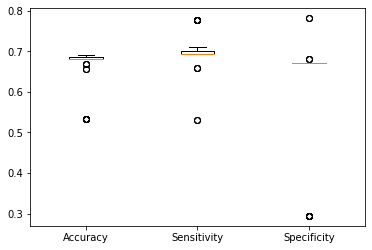

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6333050847457629
Sensitivity :  0.604957264957265
Specificity :  0.6611764705882357


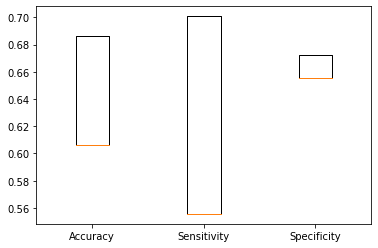

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6283898305084747
Sensitivity :  0.601965811965812
Specificity :  0.6543697478991598


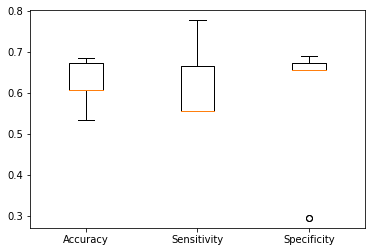

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6059322033898307
Sensitivity :  0.5555555555555555
Specificity :  0.6554621848739498


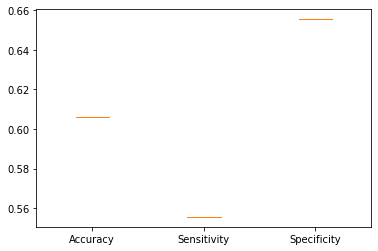

Drop: Wdirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6059322033898307
Sensitivity :  0.5555555555555555
Specificity :  0.6554621848739498


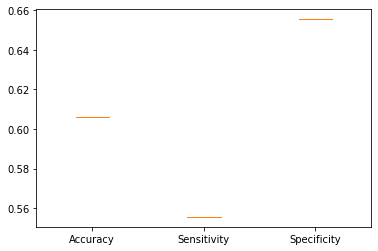

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.630127118644068
Sensitivity :  0.5988034188034189
Specificity :  0.6609243697478995


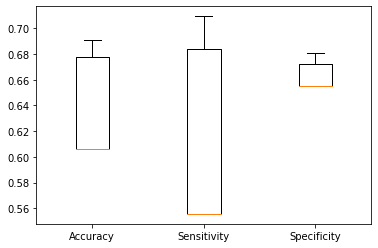

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.622542372881356
Sensitivity :  0.5886324786324786
Specificity :  0.6558823529411767


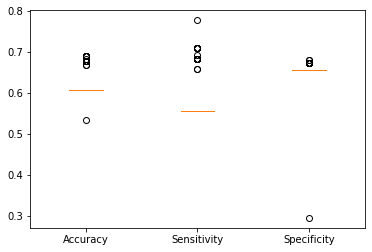

Drop: BeachType
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6241525423728815
Sensitivity :  0.5883760683760684
Specificity :  0.6593277310924373


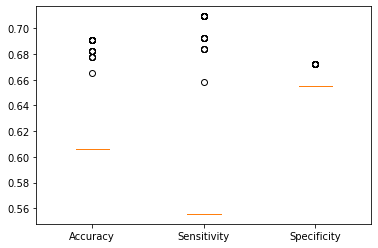

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5929661016949154
Sensitivity :  0.5955555555555555
Specificity :  0.590420168067227


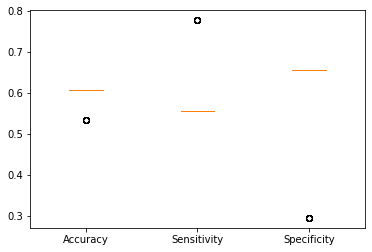

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'on_offshore']
Overall accuracy :  0.6218220338983051
Sensitivity :  0.5906837606837607
Specificity :  0.652436974789916


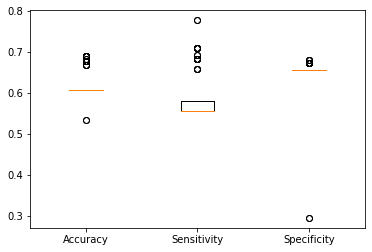

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.6149576271186441
Sensitivity :  0.5753846153846154
Specificity :  0.6538655462184876


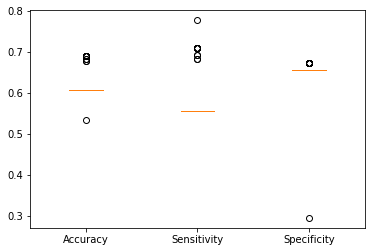

Best sensitivity:  0.7010256410256411 after drop  ['Wdirection_level', 'Rain24']
Best accuracy:  0.6616525423728813 after drop  ['Wdirection_level', 'Rain24']


In [9]:
### BDT with ADASYN balanced data - based on best sensitivity - drop second parameter one each time to compare
print("BDT model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run BDT
        bdt=AdaBoost.fit(trainset_data, trainset_labels)
        cm1 = confusion_matrix(testset_labels,bdt.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [10]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

BDT model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection_level', 'Rain24']
Drop: Rain48
input data - ['Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6730084745762713
Sensitivity :  0.7038461538461541
Specificity :  0.6426890756302521


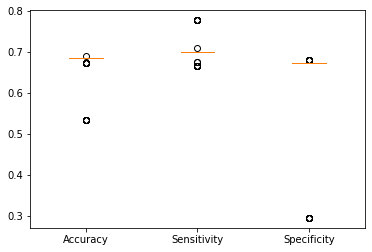

Drop: Rain72
input data - ['Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.658177966101695
Sensitivity :  0.6988034188034188
Specificity :  0.6182352941176472


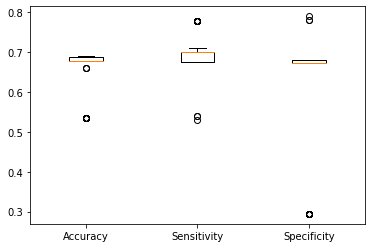

Drop: RainWA
input data - ['Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5790677966101696
Sensitivity :  0.7444444444444445
Specificity :  0.41647058823529415


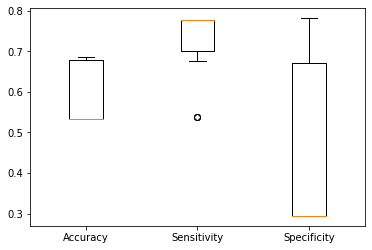

Drop: Wdirection
input data - ['Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5623728813559322
Sensitivity :  0.6286324786324786
Specificity :  0.49722689075630255


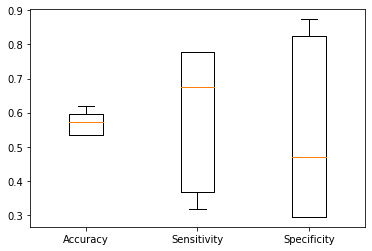

Drop: Wspeed
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6638559322033898
Sensitivity :  0.7039316239316241
Specificity :  0.6244537815126051


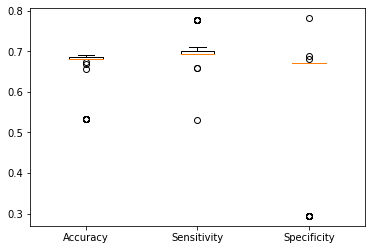

Drop: Solarhours
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6652542372881355
Sensitivity :  0.6989743589743591
Specificity :  0.6321008403361345


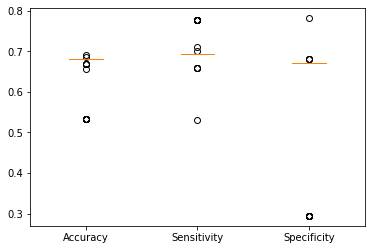

Drop: BeachType
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.6655508474576273
Sensitivity :  0.7035897435897438
Specificity :  0.6281512605042017


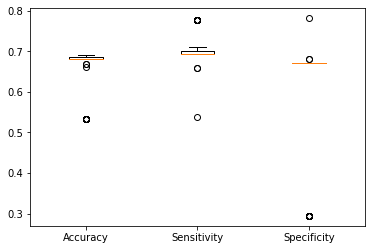

Drop: BeachDirection
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


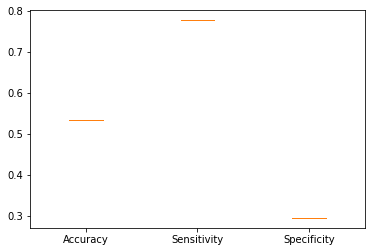

Drop: Wspeed_level
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'on_offshore']
Overall accuracy :  0.6683898305084746
Sensitivity :  0.70008547008547
Specificity :  0.6372268907563027


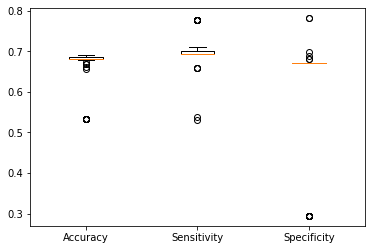

Drop: on_offshore
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.6634745762711864
Sensitivity :  0.7018803418803421
Specificity :  0.6257142857142857


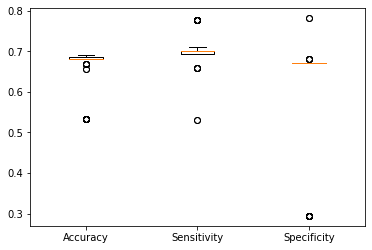

Best sensitivity:  0.7777777777777776 after drop  ['Wdirection_level', 'Rain24', 'BeachDirection']
Best accuracy:  0.6730084745762713 after drop  ['Wdirection_level', 'Rain24', 'Rain48']


In [11]:
### BDT with ADASYN balanced data - based on best sensitivity - drop 3rd parameter one each time to compare
print("BDT model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run BDT
        bdt=AdaBoost.fit(trainset_data, trainset_labels)
        cm1 = confusion_matrix(testset_labels,bdt.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [13]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

BDT model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection_level', 'Rain24', 'BeachDirection']
Drop: Rain48
input data - ['Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


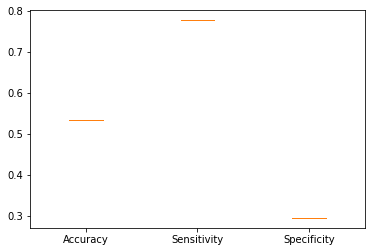

Drop: Rain72
input data - ['Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


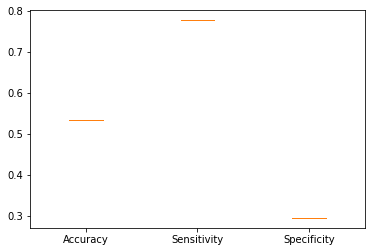

Drop: RainWA
input data - ['Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


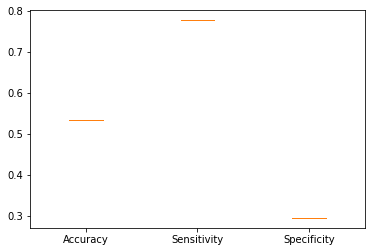

Drop: Wdirection
input data - ['Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.613771186440678
Sensitivity :  0.4464957264957265
Specificity :  0.7782352941176471


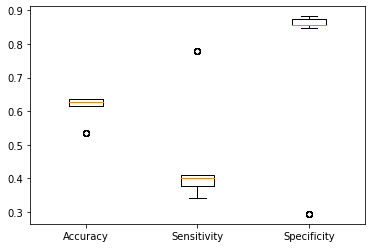

Drop: Wspeed
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


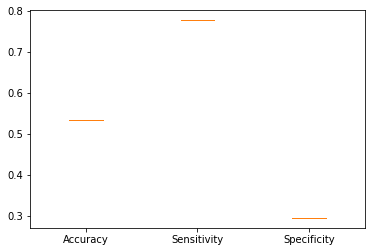

Drop: Solarhours
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'BeachType'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


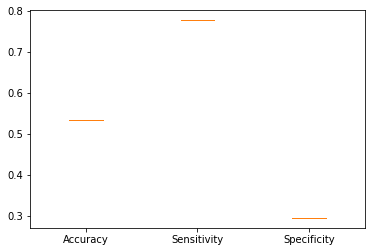

Drop: BeachType
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


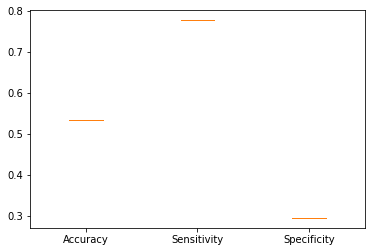

Drop: Wspeed_level
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'on_offshore']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


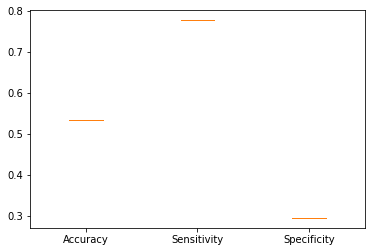

Drop: on_offshore
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level']
Overall accuracy :  0.5338983050847458
Sensitivity :  0.7777777777777776
Specificity :  0.29411764705882343


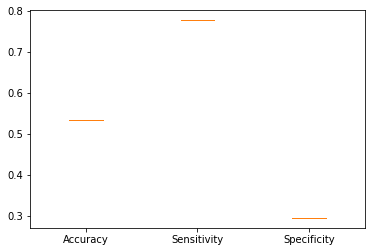

Best sensitivity:  0.7777777777777776 after drop  ['Wdirection_level', 'Rain24', 'BeachDirection']
Best accuracy:  0.6730084745762713 after drop  ['Wdirection_level', 'Rain24', 'Rain48']


In [14]:
### BDT with ADASYN balanced data - based on best sensitivity - drop 4th parameter one each time to compare
print("BDT model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run BDT
        bdt=AdaBoost.fit(trainset_data, trainset_labels)
        cm1 = confusion_matrix(testset_labels,bdt.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [16]:
print("There are no more improvement from drop additional parameters.")
print('The best sensitivity is: ',best_sen, 'after drop ', best_sen_drop)
print('The best accuracy is: ', best_acc, 'after drop ', best_acc_drop)

There are no more improvement from drop additional parameters.
The best sensitivity is:  0.7777777777777776 after drop  ['Wdirection_level', 'Rain24', 'BeachDirection']
The best accuracy is:  0.6730084745762713 after drop  ['Wdirection_level', 'Rain24', 'Rain48']


In [17]:
# Best models test on separate test-set

# Import testset
testset = pd.read_csv("PB5_testset.csv")

# Delete columns "DATE","Entero","BeachName"
test_set = testset.drop(columns=['Entero','DATE','BeachName'])

# Move column "Entero_level" to the front
test_set = test_set[ ['Entero_level'] + [ col for col in test_set.columns if col != 'Entero_level' ] ]
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entero_level      201 non-null    int64  
 1   Rain24            201 non-null    float64
 2   Rain48            201 non-null    float64
 3   Rain72            201 non-null    float64
 4   RainWA            201 non-null    float64
 5   Wdirection        201 non-null    int64  
 6   Wspeed            201 non-null    float64
 7   Solarhours        201 non-null    float64
 8   BeachType         201 non-null    int64  
 9   BeachDirection    201 non-null    int64  
 10  Wspeed_level      201 non-null    int64  
 11  Wdirection_level  201 non-null    int64  
 12  on_offshore       201 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 20.5 KB


In [18]:
# Best accuracy model test on separate test-set
input_data = data_frame.drop(columns=['Entero_level'])
input_data = input_data.drop(columns=best_acc_drop)
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)

# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# Generate synthetic sampling data with ADASYN
data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
x=pd.DataFrame(data_fake, columns=c)
y=pd.DataFrame(entero_fake, columns=['Entero_level'])
x['Entero_level']=y['Entero_level'].values
data_fake_frame=x.query("Entero_level == 1")
data_fake_frame=data_fake_frame.reset_index(drop=True)
#data_fake_frame.describe()
    
# Use synthetic data to form trainset above data
input_fake_data = data_fake_frame.iloc[:,0:-1]
water_fake_label = data_fake_frame.iloc[:,-1]
    
# Use fake above data plus real below data to form trainset
trainset_below_data = input_real_below_data.drop(columns=['Entero_level'])
trainset_below_data = trainset_below_data.drop(columns=best_acc_drop)
trainset_below_labels = input_real_below_data.iloc[:,0]
trainset_data = np.vstack((input_fake_data, trainset_below_data))
trainset_labels = np.hstack((water_fake_label, trainset_below_labels))

# Test set
test_set_data = test_set.drop(columns=['Entero_level'])
test_set_data = test_set_data.drop(columns=best_acc_drop)
test_set_labels = test_set['Entero_level']

# Train/test data normalization
sc = preprocessing.Normalizer().fit(trainset_data)
trainset_data = sc.transform(trainset_data)
test_set_data = sc.transform(test_set_data)
        
# Run BDT
bdt=AdaBoost.fit(trainset_data, trainset_labels)

#print("Overall accuracy:")
#print(accuracy_score(test_set_labels,bdt.predict(test_set_data)))
print("Confusion matrix")
print(confusion_matrix(test_set_labels,bdt.predict(test_set_data)))

cm1 = confusion_matrix(test_set_labels,bdt.predict(test_set_data))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy=(cm1[0,0]+cm1[1,1])/total1
sen = cm1[1,1]/(cm1[1,0]+cm1[1,1])
spe = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print ('Accuracy : ', accuracy)
print('Sensitivity : ', sen)
print('Specificity : ', spe)

['Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Confusion matrix
[[88 81]
 [ 5 27]]
Accuracy :  0.572139303482587
Sensitivity :  0.84375
Specificity :  0.5207100591715976


In [19]:
# Best sensitivity model test on separate test-set
best_sen_drop
input_data = data_frame.drop(columns=['Entero_level'])
input_data = input_data.drop(columns=best_sen_drop)
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)

# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# Generate synthetic sampling data with ADASYN
data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
x=pd.DataFrame(data_fake, columns=c)
y=pd.DataFrame(entero_fake, columns=['Entero_level'])
x['Entero_level']=y['Entero_level'].values
data_fake_frame=x.query("Entero_level == 1")
data_fake_frame=data_fake_frame.reset_index(drop=True)
#data_fake_frame.describe()
    
# Use synthetic data to form trainset above data
input_fake_data = data_fake_frame.iloc[:,0:-1]
water_fake_label = data_fake_frame.iloc[:,-1]
    
# Use fake above data plus real below data to form trainset
trainset_below_data = input_real_below_data.drop(columns=['Entero_level'])
trainset_below_data = trainset_below_data.drop(columns=best_sen_drop)
trainset_below_labels = input_real_below_data.iloc[:,0]
trainset_data = np.vstack((input_fake_data, trainset_below_data))
trainset_labels = np.hstack((water_fake_label, trainset_below_labels))

# Test set
test_set_data = test_set.drop(columns=['Entero_level'])
test_set_data = test_set_data.drop(columns=best_sen_drop)
test_set_labels = test_set['Entero_level']

# Train/test data normalization
sc = preprocessing.Normalizer().fit(trainset_data)
trainset_data = sc.transform(trainset_data)
test_set_data = sc.transform(test_set_data)
        
# Run BDT
bdt=AdaBoost.fit(trainset_data, trainset_labels)

#print("Overall accuracy:")
#print(accuracy_score(test_set_labels,bdt.predict(test_set_data)))
print("Confusion matrix")
print(confusion_matrix(test_set_labels,bdt.predict(test_set_data)))

cm1 = confusion_matrix(test_set_labels,bdt.predict(test_set_data))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy=(cm1[0,0]+cm1[1,1])/total1
sen = cm1[1,1]/(cm1[1,0]+cm1[1,1])
spe = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print ('Accuracy : ', accuracy)
print('Sensitivity : ', sen)
print('Specificity : ', spe)

['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'on_offshore']
Confusion matrix
[[ 54 115]
 [  3  29]]
Accuracy :  0.4129353233830846
Sensitivity :  0.90625
Specificity :  0.31952662721893493
